# Import important packges

In [ ]:
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt  
from IPython.display import display, HTML, clear_output
import math, numpy as np
import sklearn.datasets
import h5py
import glob
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model
import os
import zipfile
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/42028/project

/content/gdrive/My Drive/42028/project


# **Data Exeploration**

In [ ]:
from glob import glob
train_path = '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/gdrive/My Drive/42028/project/asl_alphabet_test/asl_alphabet_test'
folders = glob(train_path+'/*')
print(folders)
noclasses = len(folders)
print(noclasses)

['/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/A', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/B', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/C', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/D', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/E', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/F', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/G', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/H', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/I', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/J', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/K', '/content/gdrive/My Drive/42028/project/asl_alphabet_train/asl_alphabet_train/L', '/content/gdriv

unique_labels =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


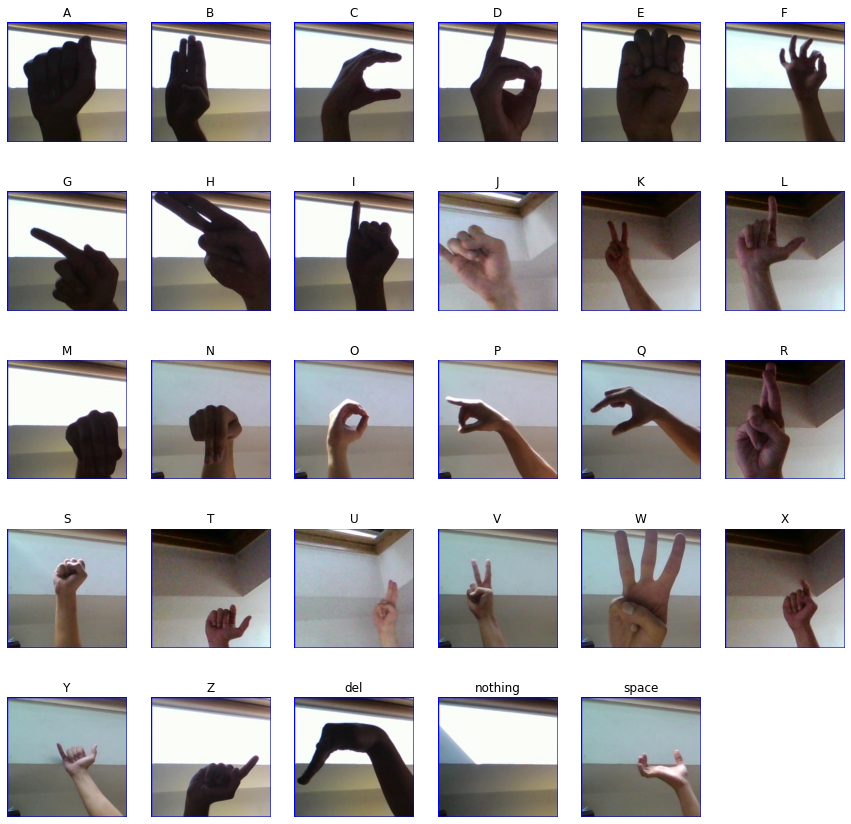

In [ ]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_path):
        for file in os.listdir(train_path + '/' + folder):
            filepath = train_path + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

# Image Datagenerator

In [ ]:
source1 = "/content/gdrive/MyDrive/42028/project/asl_alphabet_train/asl_alphabet_train"

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.1)    

train_dataset = image_generator.flow_from_directory( 
                                                 source1,
                                                 batch_size=128,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(
                                                 source1,
                                                 batch_size=128,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 77894 images belonging to 29 classes.
Found 8642 images belonging to 29 classes.


# **Pretrained VGG16**

In [ ]:
#VGG16 pre-trained model without fully connected layers and with different input dimensions
from keras.applications import VGG16
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers

conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


# Load the CONV layers of VGG16 model and add the FC layers
vgg_model = models.Sequential()
vgg_model.add(conv_base)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(265, activation='relu'))
vgg_model.add(layers.Dense(29, activation='softmax'))

In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 265)               6648585   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                7714      
Total params: 21,370,987
Trainable params: 21,370,987
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in conv_base.layers [:-6]:
   layer.trainable = False
    
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ffaed32ba10> False
<keras.layers.convolutional.Conv2D object at 0x7ffaeae35210> False
<keras.layers.convolutional.Conv2D object at 0x7ffaeae35150> False
<keras.layers.pooling.MaxPooling2D object at 0x7ffaea6af090> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9e7b2d0> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9e69150> False
<keras.layers.pooling.MaxPooling2D object at 0x7ffae9e3c490> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9e7b6d0> False
<keras.layers.convolutional.Conv2D object at 0x7ffaecec3e90> False
<keras.layers.convolutional.Conv2D object at 0x7ffaead90110> False
<keras.layers.pooling.MaxPooling2D object at 0x7ffaeae344d0> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9de1150> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9e307d0> False
<keras.layers.convolutional.Conv2D object at 0x7ffae9e3d8d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7ffaeadefdd0> 

In [ ]:
vgg_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
filepath='/content/gdrive/MyDrive/42028/project/FinalVGG.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=2)

In [ ]:
vgg_model_history = vgg_model.fit_generator(
      train_dataset,
      steps_per_epoch= 609,  
      epochs= 5,
      verbose= 1,
      validation_data = validation_dataset,
      callbacks = [checkpoint],
      validation_steps= 68)

In [ ]:
import h5py
vgg_model.save('VGGTrained_model3.h5')
vgg_model.save_weights("VGGWeights3.h5")

# **Model Evaluation**

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1/255)
testing_generator = testing_datagen.flow_from_directory(
        ("/content/gdrive/MyDrive/42028/project/asl_alphabet_test/asl_alphabet_test"),  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized 
        batch_size=1,
        class_mode='categorical')

Found 493 images belonging to 29 classes.


In [ ]:
vgg_model.evaluate(testing_generator)

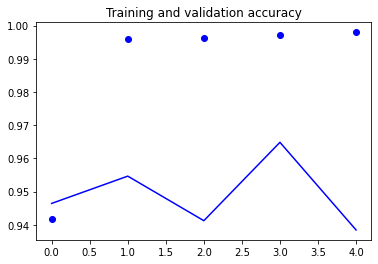

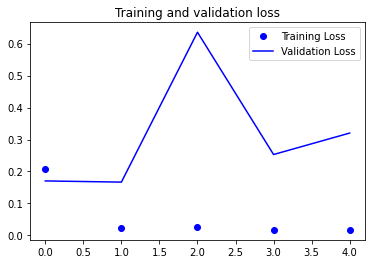

In [ ]:
import matplotlib.pyplot as plt

acc =vgg_model_history.history['accuracy']
val_acc = vgg_model_history.history['val_accuracy']
loss = vgg_model_history.history['loss']
val_loss = vgg_model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()